<br>ETHICS
<i>Margaret Snape 02548166</i><br><br>

Define colour palette for plotting:


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Welcome to DALEX (version: 2.4.3).
Find examples and detailed introduction at: http://ema.drwhy.ai/



Attaching package: 'DALEX'


The following object is masked from 'package:dplyr':

    explain




,gender,age,class,embarked,fare,sibsp,parch,survived
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,male,42,3rd,Southampton,7.11,0,0,0
2,male,13,3rd,Southampton,20.05,0,2,0
3,male,16,3rd,Southampton,20.05,1,1,0
4,female,39,3rd,Southampton,20.05,1,1,1
5,female,16,3rd,Southampton,7.13,0,0,1
6,male,25,3rd,Southampton,7.13,0,0,1


[1] "1st"  "2nd"  "3rd"  "crew"

,gender,age,class,embarked,fare,sibsp,parch,survived,class_crew,passenger_crew
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,male,42,3rd,Southampton,7.11,0,0,0,3rd,passenger
2,male,13,3rd,Southampton,20.05,0,2,0,3rd,passenger
3,male,16,3rd,Southampton,20.05,1,1,0,3rd,passenger
4,female,39,3rd,Southampton,20.05,1,1,1,3rd,passenger
5,female,16,3rd,Southampton,7.13,0,0,1,3rd,passenger
6,male,25,3rd,Southampton,7.13,0,0,1,3rd,passenger


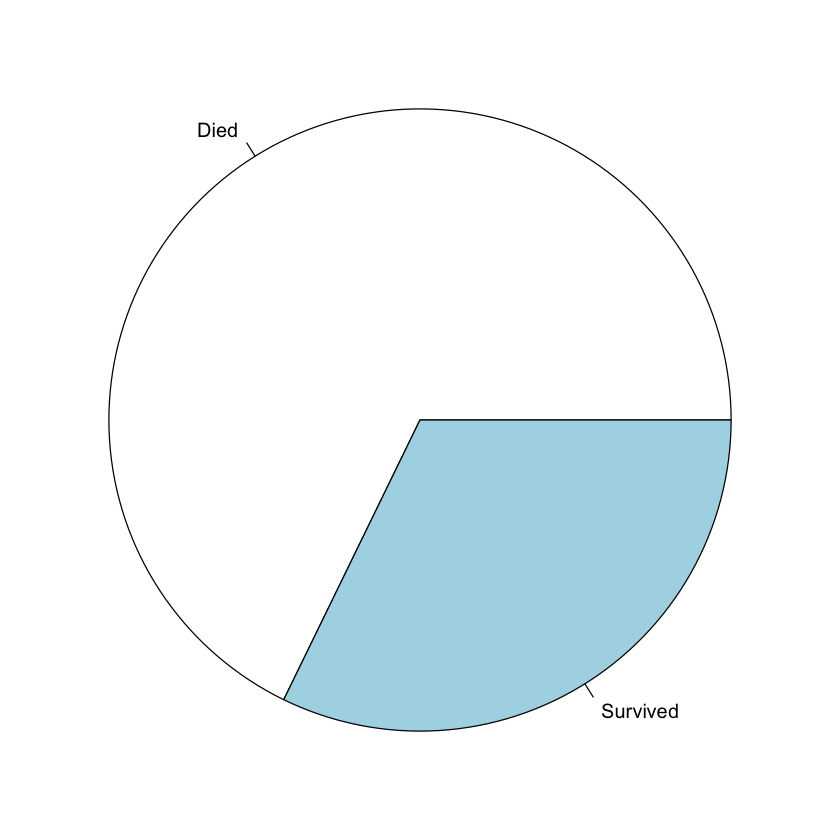

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(DALEX)

titanic_data<- (titanic_imputed)
head(titanic_data)

survivedTable <- table(titanic_data$survived)
par(mar = c(0,0,0,0), oma=c(0,0,0,0))
pie(survivedTable, labels=c("Died", "Survived"))

# changing the different types of crew/staff into a joint 'crew' group
titanic_data$class_crew <- as.character(titanic_data$class)
titanic_data$class_crew[(grepl("crew", titanic_data$class_crew)) | 
        (grepl("staff", titanic_data$class_crew))] <-  'crew'
titanic_data$class_crew <- as.factor(titanic_data$class_crew)
levels((titanic_data$class_crew))

# Creating a passenger/crew column ie removing classes of passengers
titanic_data$passenger_crew <- as.character(titanic_data$class_crew)
titanic_data$passenger_crew[(!grepl("crew", titanic_data$class_crew))] <- 
                                                             'passenger'
titanic_data$passenger_crew <- as.factor(titanic_data$passenger_crew)
head(titanic_data)

In [2]:
print("****")
pass_saved <- nrow(titanic_data[titanic_data$class_crew != 'crew' & 
    titanic_data$survived == 1,  ])
pass_lost<- nrow(titanic_data[titanic_data$class_crew != 'crew' & 
    titanic_data$survived==0, ])
crew_saved <- nrow(titanic_data[titanic_data$class_crew =='crew' & 
    titanic_data$survived==1 , ])
crew_lost <- nrow(titanic_data[titanic_data$class_crew =='crew' & 
    titanic_data$survived==0 ,])
cat("passenger saved lost ", pass_saved,  pass_lost, pass_saved + pass_lost,'\n')
cat("crew saved lost ", crew_saved, crew_lost, crew_saved + crew_lost,'\n')
cat("passenger survival ", (pass_saved/(pass_saved+pass_lost)),'\n')
cat("crew survival ", (crew_saved/(crew_saved+crew_lost)),'\n')

pass_saved_men <- nrow(titanic_data[titanic_data$class_crew != 'crew' & 
    titanic_data$survived == 1 & titanic_data$gender=='male',  ])
pass_lost_men<- nrow(titanic_data[titanic_data$class_crew != 'crew' & 
    titanic_data$survived==0  & titanic_data$gender=='male', ])
crew_saved_men <- nrow(titanic_data[titanic_data$class_crew =='crew' & 
    titanic_data$survived==1  & titanic_data$gender=='male', ])
crew_lost_men <- nrow(titanic_data[titanic_data$class_crew =='crew' & 
    titanic_data$survived==0 & titanic_data$gender=='male',])
cat("male passenger saved lost ", pass_saved_men,  
    pass_lost_men, pass_saved_men + pass_lost_men, '\n')
cat("male crew saved lost ", crew_saved_men, crew_lost_men, 
    crew_saved_men + crew_lost_men,'\n')
cat("passenger survival men", 
    (pass_saved_men/(pass_saved_men+pass_lost_men)),'\n')
cat("crew survival men", (crew_saved_men/(crew_saved_men+crew_lost_men)),'\n')

pass_saved_women <- nrow(titanic_data[titanic_data$class_crew != 'crew' & 
    titanic_data$survived == 1 & titanic_data$gender=='female',  ])
pass_lost_women<- nrow(titanic_data[titanic_data$class_crew != 'crew' & 
    titanic_data$survived==0  & titanic_data$gender=='female', ])
crew_saved_women <- nrow(titanic_data[titanic_data$class_crew =='crew' & 
    titanic_data$survived==1  & titanic_data$gender=='female', ])
crew_lost_women <- nrow(titanic_data[titanic_data$class_crew =='crew' & 
    titanic_data$survived==0 & titanic_data$gender=='female',])
cat("female passenger saved lost ", pass_saved_women,  pass_lost_women, 
    pass_saved_women +  pass_lost_women,'\n')
cat("female crew saved lost ", crew_saved_women, crew_lost_women, 
    crew_saved_women + crew_lost_women ,'\n')
cat("pass survival women", (pass_saved_women/(pass_saved_women+pass_lost_women)),'\n')
cat("crew survival women", (crew_saved_women/(crew_saved_women+crew_lost_women)))

[1] "****"
passenger saved lost  500 817 1317 
crew saved lost  211 679 890 
passenger survival  0.3796507 
crew survival  0.2370787 
male passenger saved lost  161 690 851 
male crew saved lost  191 676 867 
passenger survival men 0.1891892 
crew survival men 0.2202999 
female passenger saved lost  339 127 466 
female crew saved lost  20 3 23 
pass survival women 0.7274678 
crew survival women 0.8695652

$$
\begin{aligned}
& \text {Table 1.1. }\\
&\begin{array}{ccccc}
\hline \hline \text { Class} &	 \text {Saved} &	 \text {Lost}	&  \text {Total}	&  \text {Survival Rate}	 \\
\text {Passenger} &	500	  & 817 &   1317	&    37.97\% \\
\text {Crew}	& 211	&    679	&    890	&    23.71\%\\
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Table 1.1. }\\
&\begin{array}{ccccccccc}
\hline \hline \text { Class } & \text { Men } & \text {  } & \text {  }  &  \text {  } & \text { Women } \\
\text {Class} &	\text {Saved} &	\text {Lost} & \text {Total}	& \text {Survival Rate}	& \text {Saved} &	\text {Lost}& \text {Total}	&\text {Survival Rate} \\
\text {Passenger} &	161	  &  690 &   851	&    18.92\%	  &      339	 &   127  &	466	     &      72.75\% \\
\text {Crew}	& 191	&    676	&    867	&    22.03\%	   &     20	  &  3	 &   23	    &        86.96\% \\
\end{array}
\end{aligned}
$$

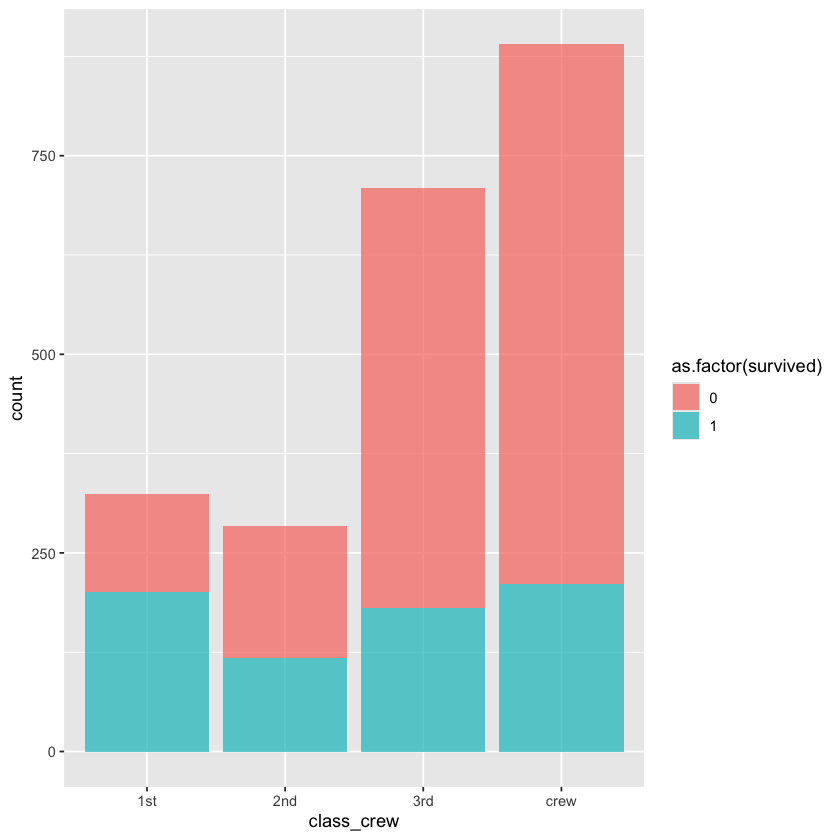

In [3]:
ggplot(titanic_data, aes(x=class_crew, fill=as.factor(survived)), binwidth = 0.5) +
  geom_bar(alpha = 0.7) #, position="dodge")


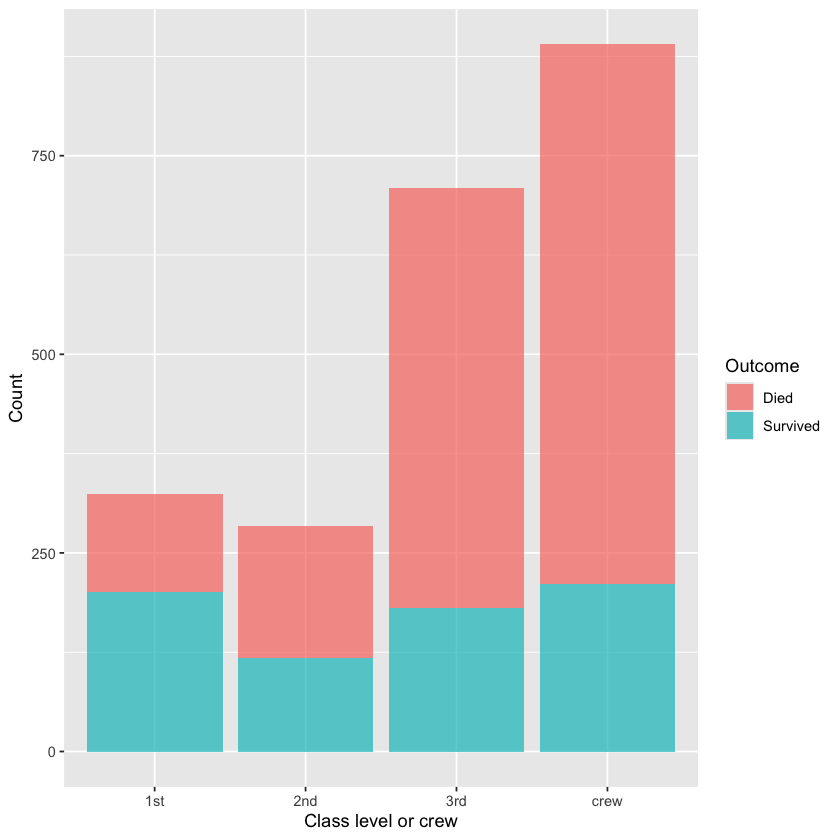

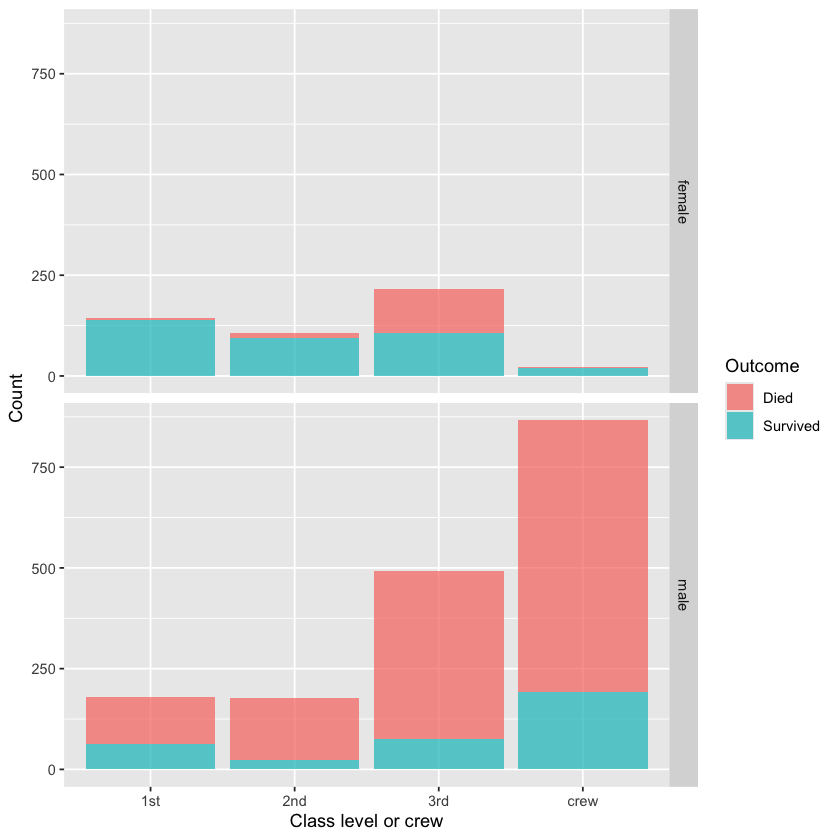

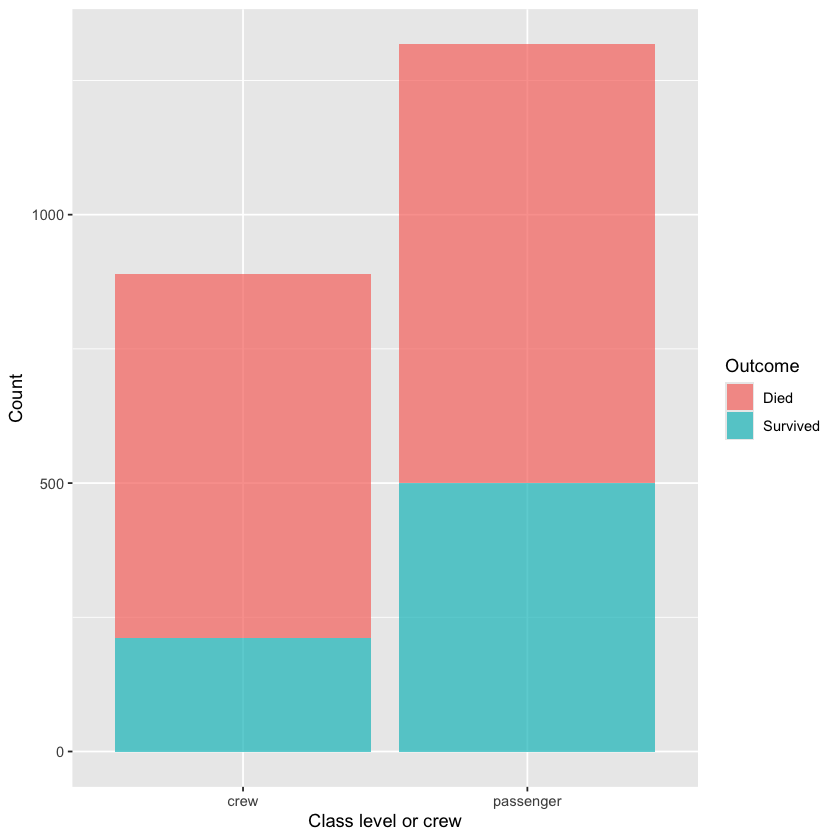

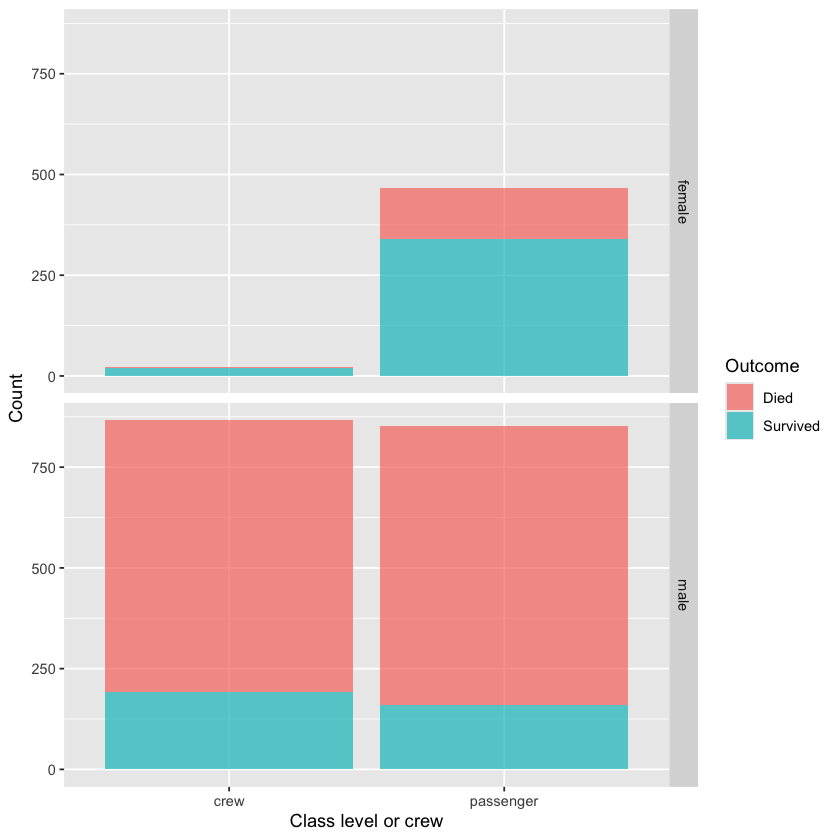

In [4]:
ggplot(titanic_data, aes(x=class_crew, fill=as.factor(survived))) +
  geom_bar(alpha = 0.7)+ #, position="dodge") +
  labs( y = "Count", x = "Class level or crew") +
  scale_fill_discrete(name = "Outcome", labels = c("Died", "Survived"))


#library(MASS)

# Use gender as the faceting variable
facet_plot <- ggplot(titanic_data, aes(x = class_crew, fill=as.factor(survived))) +
  geom_bar( alpha = 0.7) +
  labs(fill="Survived", y = "Count", x = "Class level or crew",) +
  scale_fill_discrete(name = "Outcome", labels = c("Died", "Survived")) +
  facet_grid(gender ~ .)

print(facet_plot )

ggplot(titanic_data, aes(x=passenger_crew, fill=as.factor(survived))) +
  geom_bar(alpha = 0.7)+ #, position="dodge") +
  labs( y = "Count", x = "Class level or crew") +
  scale_fill_discrete(name = "Outcome", labels = c("Died", "Survived"))

# Use gender as the faceting variable
facet_plot2 <- ggplot(titanic_data, aes(x = passenger_crew, fill=as.factor(survived))) +
  geom_bar( alpha = 0.7) +
  labs(fill="Survived", y = "Count", x = "Class level or crew",) +
  scale_fill_discrete(name = "Outcome", labels = c("Died", "Survived")) +
  facet_grid(gender ~ .)

print(facet_plot2 )

Rows: 700 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): treatment, stone_size
dbl (1): success

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


treatment,stone_size,success
<chr>,<chr>,<dbl>
B,large,1
A,large,1
A,large,0
A,large,1
A,large,1
B,large,1


`geom_smooth()` using formula = 'y ~ x'


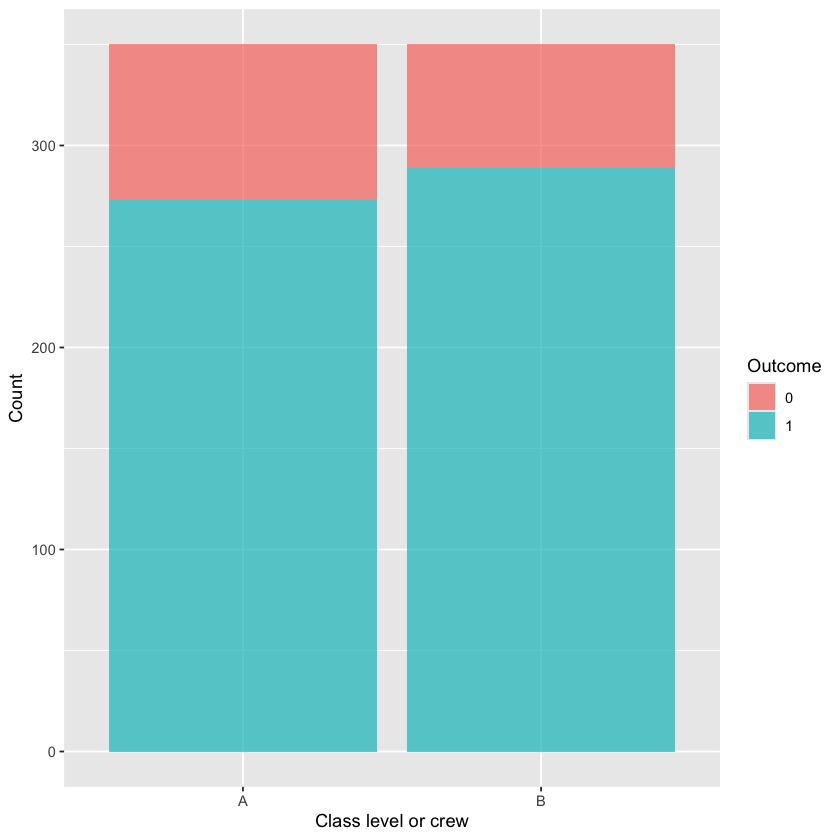

`geom_smooth()` using formula = 'y ~ x'


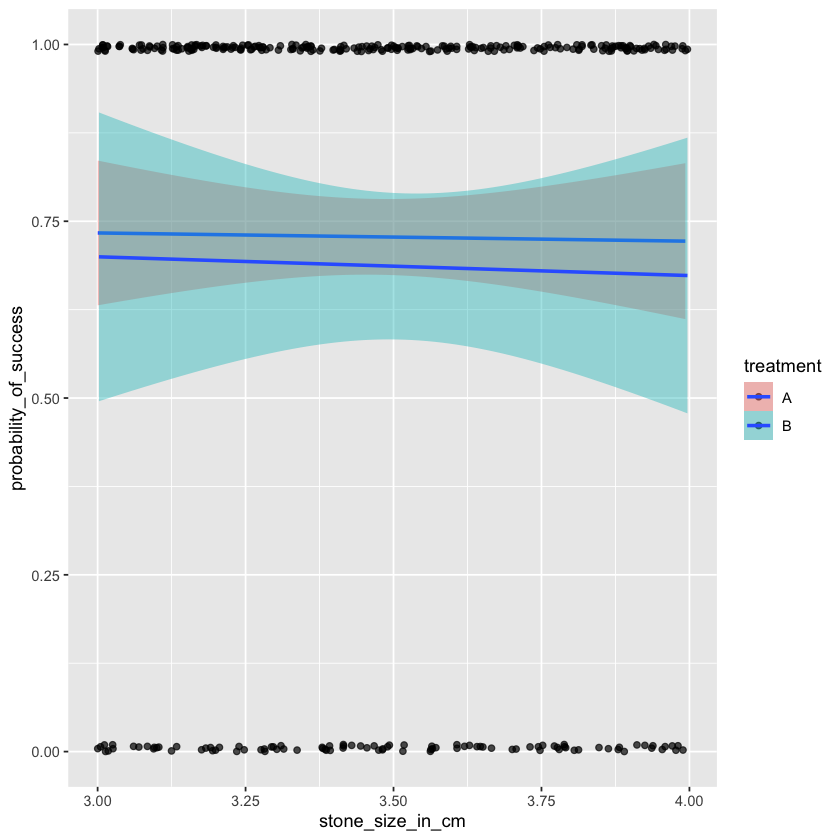

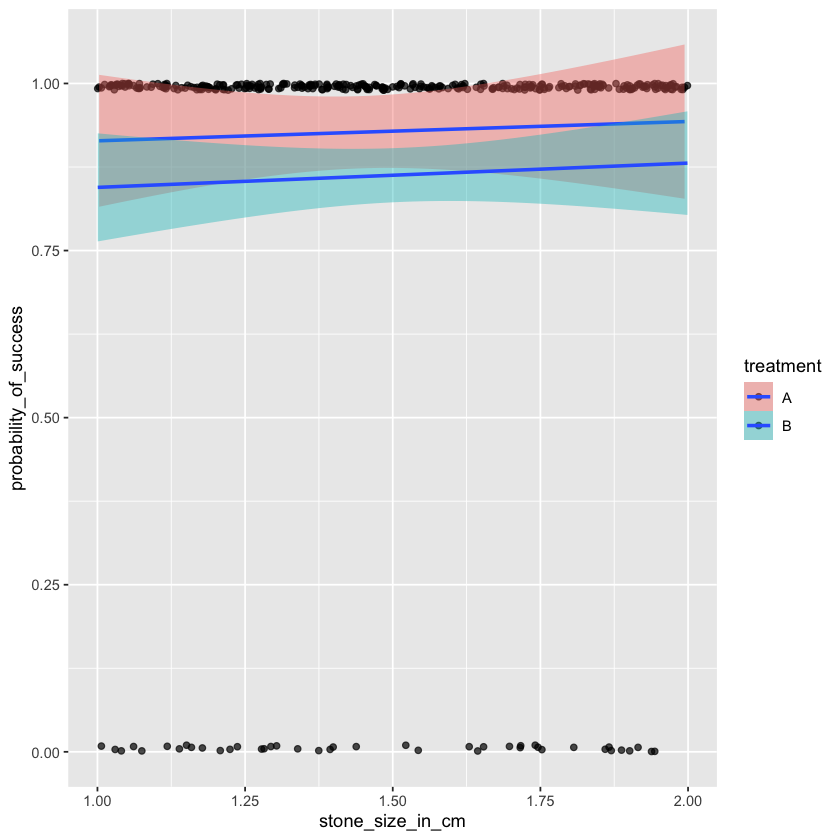

In [5]:
kidney_data <- read_csv("kidney_stone_data.csv")
head(kidney_data)

#add column with generated stone size < 2cm and >2cm
# could add age?
set.seed(4)
kidney_data$stone_size_in_cm <- runif(nrow(kidney_data), min= 0, max=1)
kidney_data$stone_size_in_cm[kidney_data$stone_size=="large"] <- 
  kidney_data$stone_size_in_cm[kidney_data$stone_size=="large"] + 3
kidney_data$stone_size_in_cm[kidney_data$stone_size=="small"] <- 
  kidney_data$stone_size_in_cm[kidney_data$stone_size=="small"] + 1

kidney_data$probability_of_success <- runif(nrow(kidney_data), min= 0, max=0.01)
kidney_data$probability_of_success <- 
  abs(kidney_data$probability_of_success - kidney_data$success)

ggplot(kidney_data, aes(x=treatment, fill=as.factor(success))) +
  geom_bar(alpha = 0.7) + #, position="dodge") +
  labs( y = "Count", x = "Class level or crew") +
  scale_fill_discrete(name = "Outcome") #, labels = c("Died", "Survived"))

large_kidney_stone_data <- subset(kidney_data, stone_size == "large")
p_large <- large_kidney_stone_data %>% 
  ggplot(aes(stone_size_in_cm, probability_of_success, fill=treatment))
p_large + geom_point(alpha = 0.7) + geom_smooth(method = 'lm')

small_kidney_stone_data <- subset(kidney_data, stone_size == "small")
p_small <- small_kidney_stone_data %>% 
  ggplot(aes(stone_size_in_cm, probability_of_success, fill=treatment))
p_small + geom_point(alpha = 0.7) + geom_smooth(method = 'lm')



Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
i Please use the `legend.position.inside` argument of `theme()` instead."
`geom_smooth()` using formula = 'y ~ x'


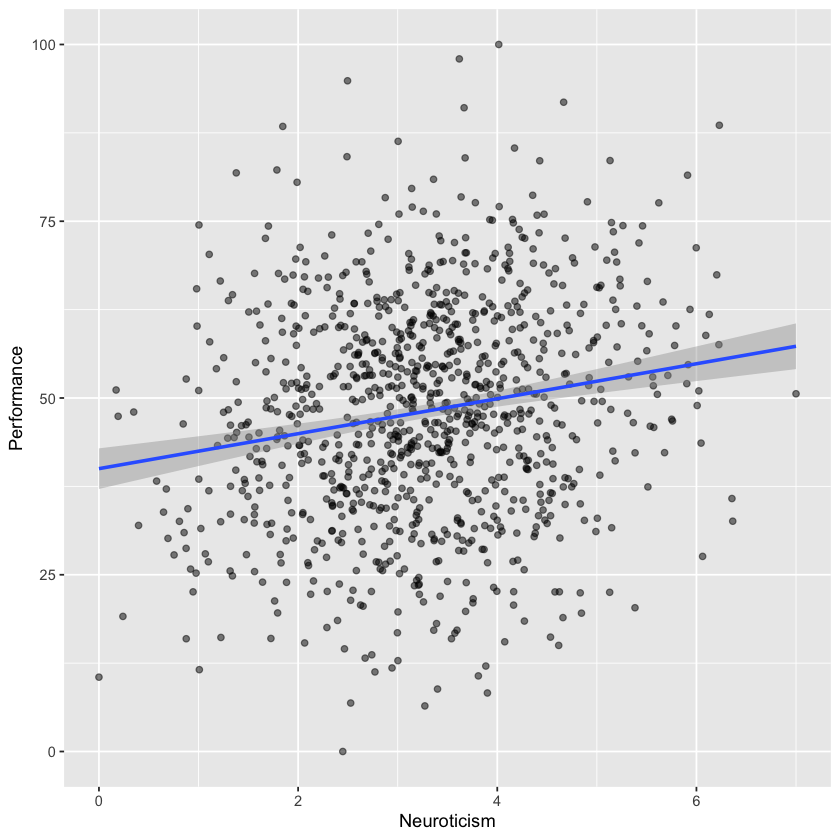

`geom_smooth()` using formula = 'y ~ x'


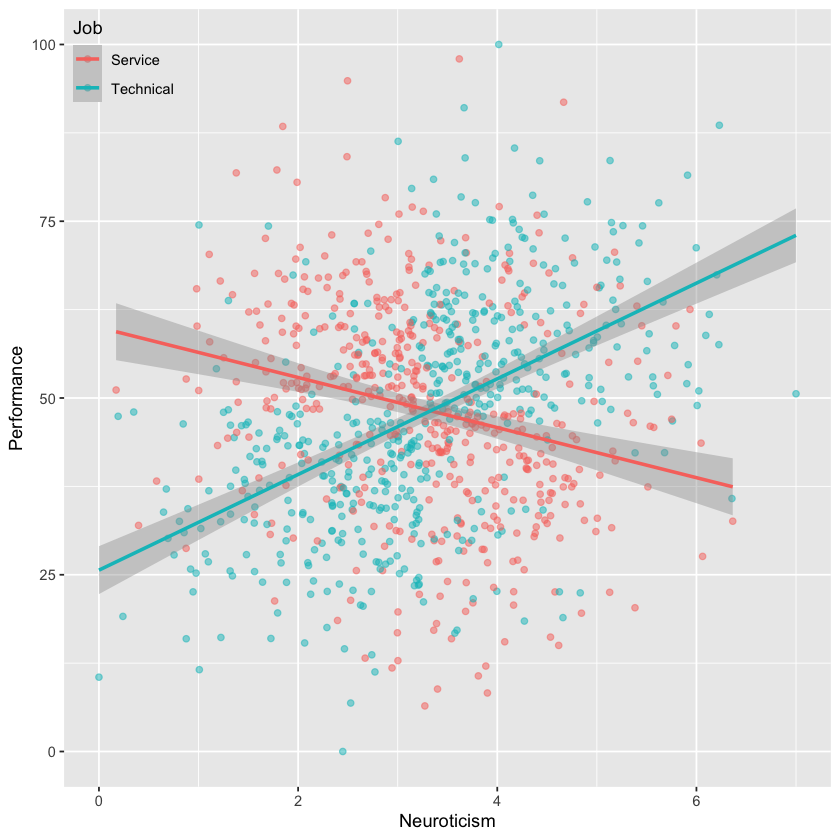

`geom_smooth()` using formula = 'y ~ x'


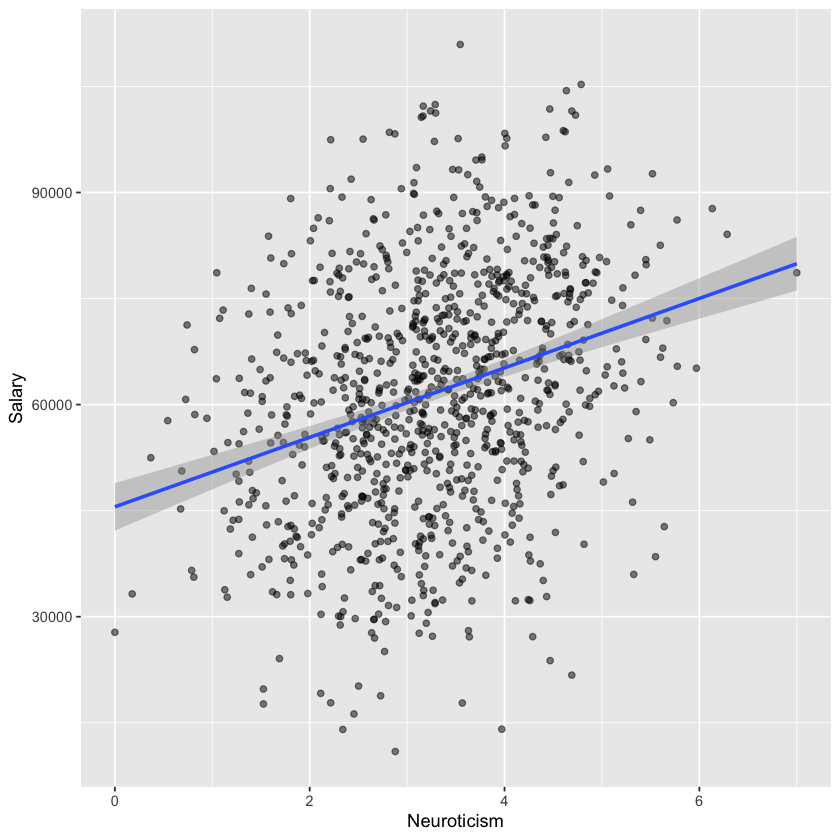

`geom_smooth()` using formula = 'y ~ x'


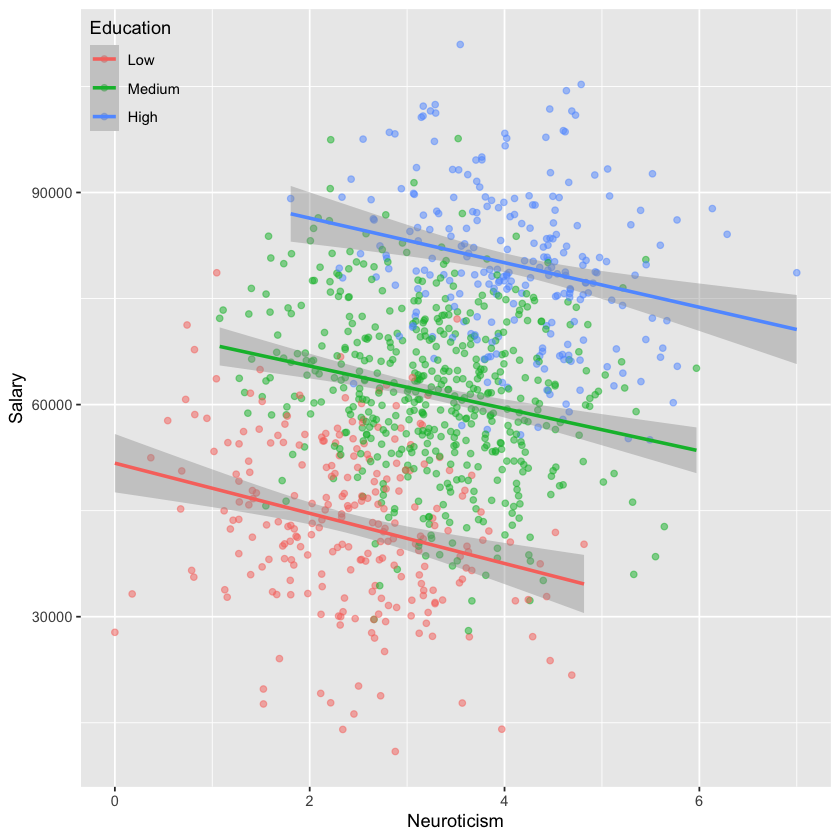

`geom_smooth()` using formula = 'y ~ x'


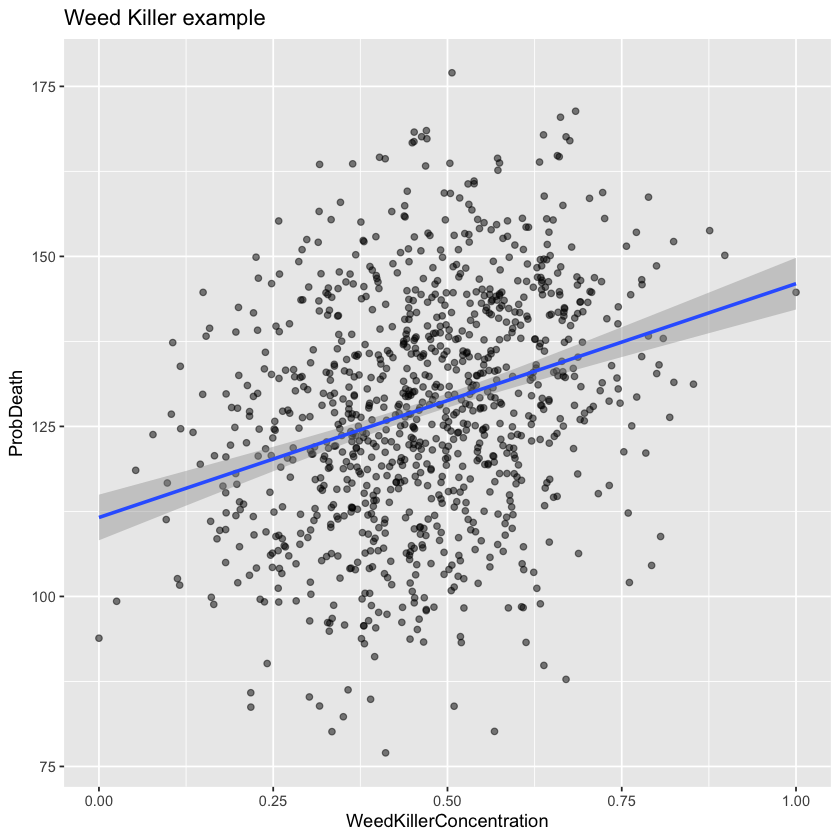

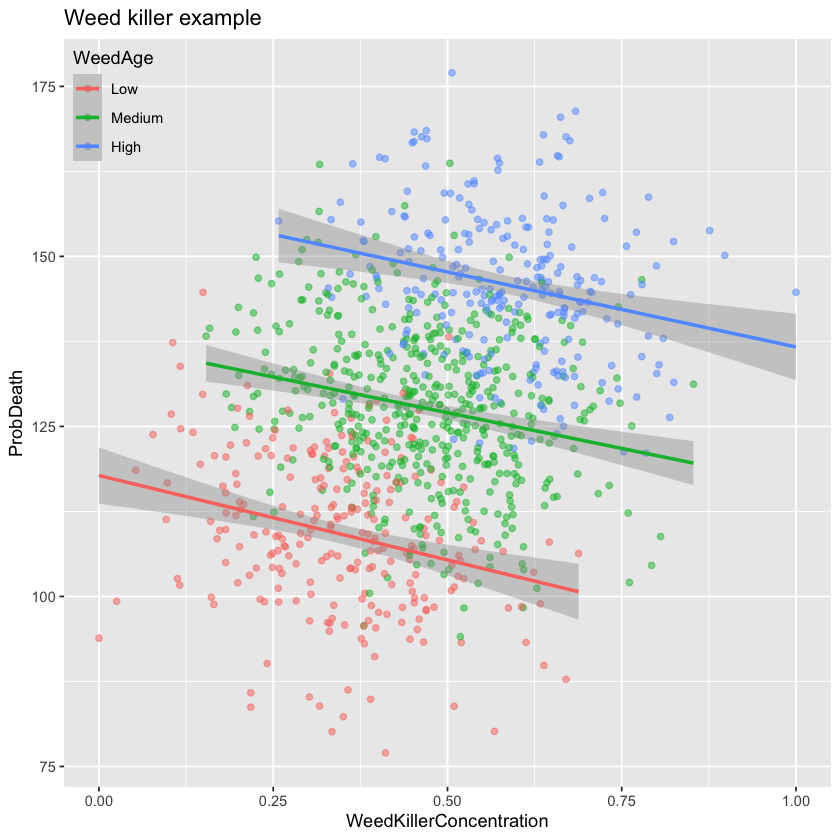

In [6]:
# generating simpsons paradox  from : https://rpubs.com/lakenp/simpsonsparadox
library(dplyr)

library(ggplot2)
library(scales)
alpha = 0.5

set.seed(123)
n = 1000

Neuroticism = rnorm(n)
Performance = rnorm(n) + Neuroticism * 0.1

Performance = rescale(Performance, to = c(0, 100))
# summary(Performance)
Neuroticism = rescale(Neuroticism, to = c(0, 7))
# summary(Neuroticism)

data <- data.frame(
  Performance,
  Neuroticism
)

options = c("Technical","Service")
technical =
  (data$Performance > mean(data$Performance) &
     data$Neuroticism > mean(data$Neuroticism)) |
  (data$Performance < mean(data$Performance) &
     data$Neuroticism < mean(data$Neuroticism))

data$Job[technical] <- sample(options, sum(technical), T, c(0.6, 0.2))
data$Job[is.na(data$Job)] <- sample(options, sum(is.na(data$Job)), T, c(0.2, 0.8))

p <- data %>% ggplot(aes(Neuroticism, Performance))
p + geom_point(alpha = alpha) + geom_smooth(method = 'lm')
p +
geom_point(aes(col = Job), alpha = alpha) +
  geom_smooth(aes(col = Job), method = 'lm') +
  theme(legend.background = element_rect(fill = "transparent"),
        legend.justification = c(0, 1),
        legend.position = c(0, 1))

set.seed(123)
n = 1000

Education = rbinom(n, 2, 0.5)
Neuroticism = rnorm(n) + Education
Salary = Education * 2 + rnorm(n) - Neuroticism * 0.3

Salary = sample(10000:11000,1) + rescale(Salary, to = c(0, 100000))
# summary(Salary)
Neuroticism = rescale(Neuroticism, to = c(0, 7))
# summary(Neuroticism)
Education = factor(Education, labels = c("Low", "Medium", "High"))

data <- data.frame(
  Salary,
  Neuroticism,
  Education
)

p <- data %>% ggplot(aes(Neuroticism, Salary))
p + geom_point(alpha = alpha) + geom_smooth(method = 'lm')
p +
  geom_point(aes(col = Education), alpha = alpha) +
  geom_smooth(aes(col = Education), method = 'lm') +
  theme(legend.background = element_rect(fill = "transparent"),
        legend.justification = c(0, 1),
        legend.position = c(0, 1))

# Random weedkiller example but could be changed to anything
ProbDeath = sample(0:100,1) + rescale(Salary, to = c(0, 100))
WeedKillerConcentration = rescale(Neuroticism, to = c(0, 1))
WeedAge = factor(Education, labels = c("Low", "Medium", "High"))
data <- data.frame(
  ProbDeath,
  WeedKillerConcentration,
  WeedAge
)

p <- data %>% ggplot(aes(  WeedKillerConcentration, ProbDeath)) + 
  ggtitle("Weed Killer example")
p + geom_point(alpha = alpha) + geom_smooth(method = 'lm')
p +
  geom_point(aes(col = WeedAge), alpha = alpha) +
  geom_smooth(aes(col = WeedAge), method = 'lm') +
  theme(legend.background = element_rect(fill = "transparent"),
        legend.justification = c(0, 1),
        legend.position = c(0, 1)) + ggtitle("Weed killer example")